In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.tree import plot_tree

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Load in CSV

In [3]:
hotels_cop = pd.read_csv("hotels_cop.csv")

In [4]:
hotels_cop.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,2015,1,0,135,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,737,2015,1,0,135,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,7,2015,1,1,59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,13,2015,1,1,59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,14,2015,1,2,59,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Pull X, y values for splits

In [5]:
y = hotels_cop["is_canceled"]
X = hotels_cop.drop(["is_canceled"], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# MODELING

# Logistic Regression with SkLearn

Hyperparameters: C=0.001, penalty=l1
Accuracy on train set: 0.7822750210260724
Accuracy on validation set: 0.7837582128777923
Hyperparameters: C=0.001, penalty=l2
Accuracy on train set: 0.7915133515559294
Accuracy on validation set: 0.7942706964520367
Hyperparameters: C=0.01, penalty=l1
Accuracy on train set: 0.8009093776282591
Accuracy on validation set: 0.8043101182654402
Hyperparameters: C=0.01, penalty=l2
Accuracy on train set: 0.8009619428090833
Accuracy on validation set: 0.8046254927726676
Hyperparameters: C=0.1, penalty=l1
Accuracy on train set: 0.8030776913372581
Accuracy on validation set: 0.805203679369251
Hyperparameters: C=0.1, penalty=l2
Accuracy on train set: 0.803248528174937
Accuracy on validation set: 0.805466491458607
Hyperparameters: C=1, penalty=l1
Accuracy on train set: 0.8034850714886459
Accuracy on validation set: 0.8059921156373193
Hyperparameters: C=1, penalty=l2
Accuracy on train set: 0.802801724137931
Accuracy on validation set: 0.8056241787122208
Hyperparam

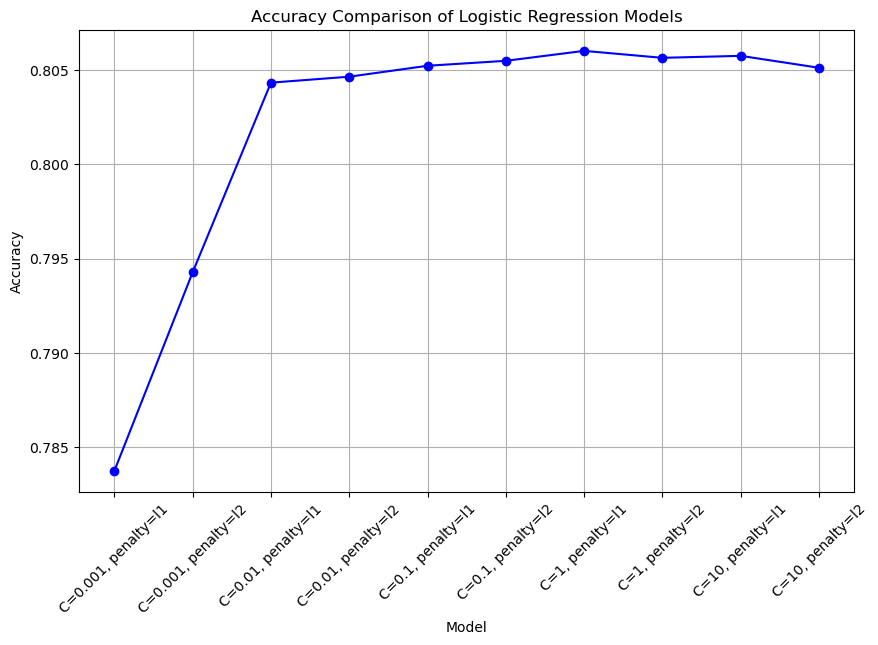


Best model evaluation on test set:
Accuracy: 0.8044657499684622
MSE: 0.1955342500315378
R-squared: 0.1674296565352993
Confusion Matrix:
 [[13540  1277]
 [ 3373  5591]]


In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

best_accuracy = 0
best_model = None
accuracies = []

for C in hyperparameters['C']:
    for penalty in hyperparameters['penalty']:
        model = LogisticRegression(C=C, penalty=penalty, solver='liblinear')
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print(f"Hyperparameters: C={C}, penalty={penalty}")
        print("Accuracy on train set:", train_accuracy)
        
        y_val_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(accuracy)
        print("Accuracy on validation set:", accuracy)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracies)), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Logistic Regression Models')
plt.xticks(range(len(accuracies)), [f'C={C}, penalty={penalty}' for C in hyperparameters['C'] for penalty in hyperparameters['penalty']], rotation=45)
plt.grid(True)
plt.show()

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("\nBest model evaluation on test set:")
print("Accuracy:", test_accuracy)
print("MSE:", mse_test)
print("R-squared:", r2_test)
print("Confusion Matrix:\n", conf_matrix_test)

# SVM SkLearn

In [8]:
target_variable = 'is_canceled'
y = hotels_cop[target_variable]

correlation = hotels_cop.corr()[target_variable]
correlation = correlation.drop(target_variable)
correlation = correlation.abs().sort_values()

num_features_to_keep = 10

features_to_drop = correlation[:num_features_to_keep].index

hotels_filtered = hotels_cop.drop(columns=features_to_drop)

In [9]:
from sklearn.metrics import accuracy_score

sampled_df = hotels_filtered.sample(n=10000, random_state=42)

y = sampled_df["is_canceled"]
X = sampled_df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

param_distributions = {'C': [0.1, 1, 10], 'kernel': ['linear']}

svm = SVC(probability=True)

random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions, n_iter=10, cv=3, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)

results = random_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

print("SVM Model Evaluation:")
for param, score in zip(params, mean_test_scores):
    model = SVC(probability=True, **param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Parameters: {param}, Mean Test Score (ROC AUC): {score:.4f}, Accuracy on Test Set: {test_accuracy:.4f}")

best_svm = random_search.best_estimator_

y_test_pred_proba = best_svm.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

print("\nBest SVM Model:")
print(f"Best Parameters: {random_search.best_params_}")
print(f"AUC on Test Set: {roc_auc_test:.2f}")

SVM Model Evaluation:
Parameters: {'kernel': 'linear', 'C': 0.1}, Mean Test Score (ROC AUC): 0.8679, Accuracy on Test Set: 0.8025
Parameters: {'kernel': 'linear', 'C': 1}, Mean Test Score (ROC AUC): 0.8652, Accuracy on Test Set: 0.7995
Parameters: {'kernel': 'linear', 'C': 10}, Mean Test Score (ROC AUC): 0.8653, Accuracy on Test Set: 0.7980

Best SVM Model:
Best Parameters: {'kernel': 'linear', 'C': 0.1}
AUC on Test Set: 0.87


# Decision Tree SkLearn

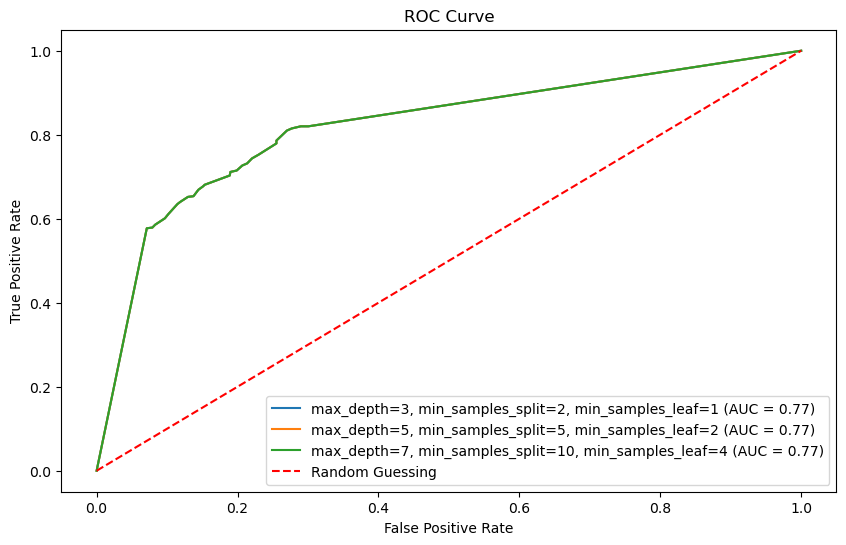

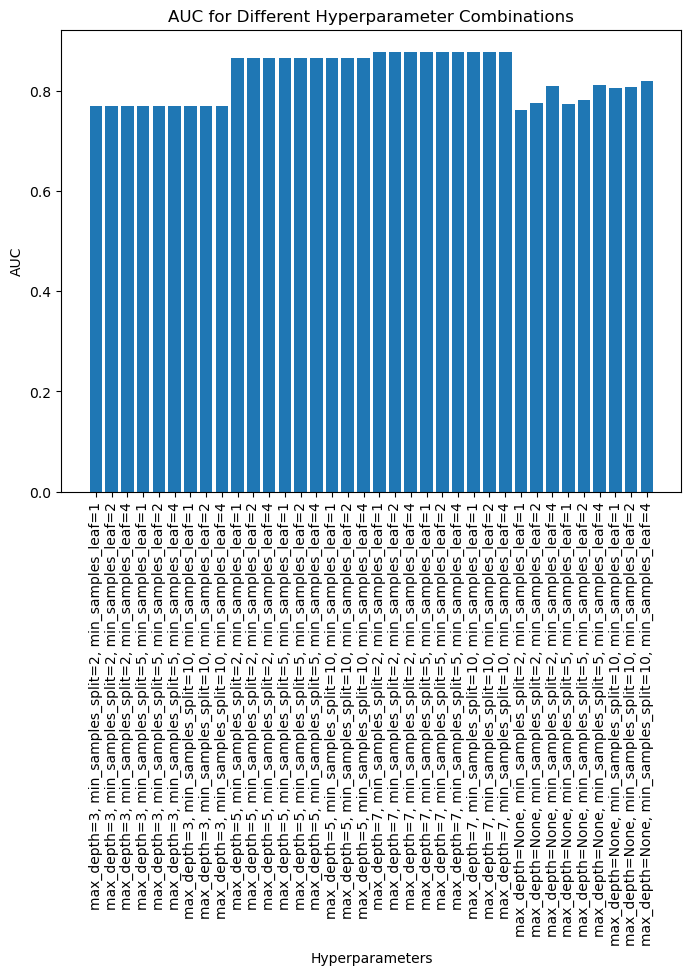

In [10]:
hyperparameters = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

roc_auc_values = []
for max_depth in hyperparameters['max_depth']:
    for min_samples_split in hyperparameters['min_samples_split']:
        for min_samples_leaf in hyperparameters['min_samples_leaf']:
            
            model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            model.fit(X_train, y_train)
            
            y_val_pred_proba = model.predict_proba(X_val)[:, 1]
            fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
            roc_auc = auc(fpr, tpr)
            roc_auc_values.append(roc_auc)

plt.figure(figsize=(10, 6))
for i, (max_depth, min_samples_split, min_samples_leaf) in enumerate(zip(hyperparameters['max_depth'], hyperparameters['min_samples_split'], hyperparameters['min_samples_leaf'])):
    plt.plot(fpr, tpr, label=f'max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf} (AUC = {roc_auc_values[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(range(len(roc_auc_values)), roc_auc_values, tick_label=[f'max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}' for max_depth in hyperparameters['max_depth'] for min_samples_split in hyperparameters['min_samples_split'] for min_samples_leaf in hyperparameters['min_samples_leaf']])
plt.xlabel('Hyperparameters')
plt.ylabel('AUC')
plt.title('AUC for Different Hyperparameter Combinations')
plt.xticks(rotation=90)
plt.show()

Best Decision Tree Model:
max_depth=7, min_samples_split=10, min_samples_leaf=4
AUC on Validation Set: 0.88
AUC on Test Set: 0.89


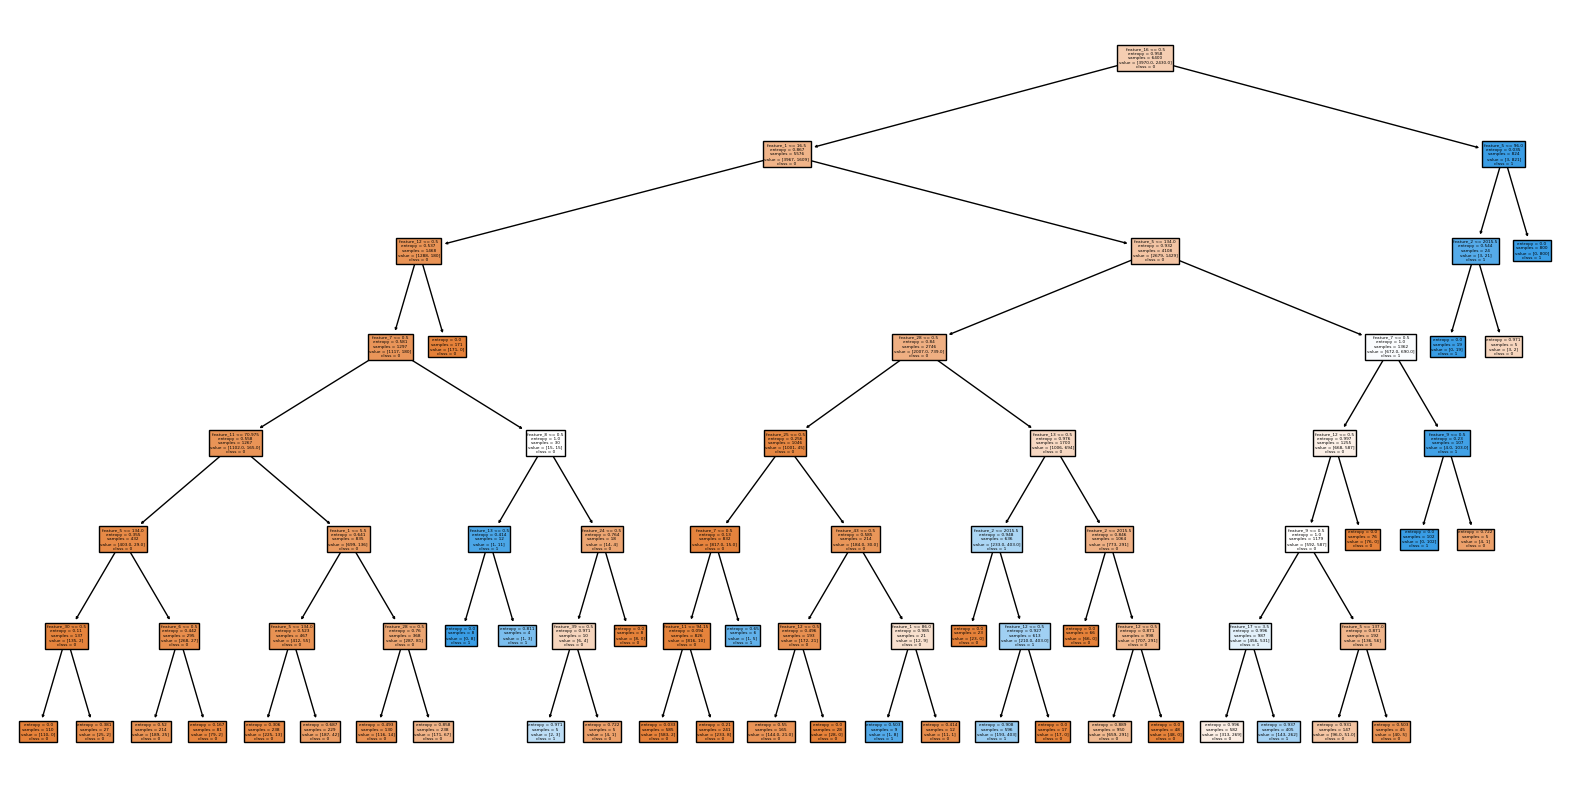

In [11]:
best_model_index = np.argmax(roc_auc_values)

best_max_depth = hyperparameters['max_depth'][best_model_index // (len(hyperparameters['min_samples_split']) * len(hyperparameters['min_samples_leaf']))]
best_min_samples_split = hyperparameters['min_samples_split'][(best_model_index // len(hyperparameters['min_samples_leaf'])) % len(hyperparameters['min_samples_split'])]
best_min_samples_leaf = hyperparameters['min_samples_leaf'][best_model_index % len(hyperparameters['min_samples_leaf'])]

best_model = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)

print("Best Decision Tree Model:")
print(f"max_depth={best_max_depth}, min_samples_split={best_min_samples_split}, min_samples_leaf={best_min_samples_leaf}")

print(f"AUC on Validation Set: {roc_auc_values[best_model_index]:.2f}")

y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"AUC on Test Set: {roc_auc_test:.2f}")

feature_names = ['feature_{}'.format(i) for i in range(X_train.shape[1])]

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()

# Random Forest SkLearn

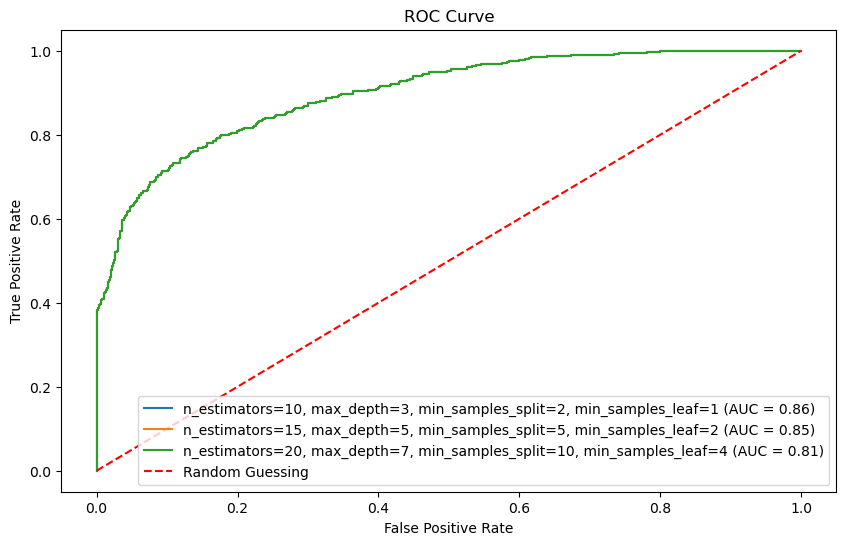

In [12]:
hyperparameters = {'n_estimators': [10, 15, 20], 'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

roc_auc_values = []
for n_estimators in hyperparameters['n_estimators']:
    for max_depth in hyperparameters['max_depth']:
        for min_samples_split in hyperparameters['min_samples_split']:
            for min_samples_leaf in hyperparameters['min_samples_leaf']:
               
                model = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                model.fit(X_train, y_train)
                
                y_val_pred_proba = model.predict_proba(X_val)[:, 1]
                fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
                roc_auc = auc(fpr, tpr)
                roc_auc_values.append(roc_auc)

plt.figure(figsize=(10, 6))
for i, (n_estimators, max_depth, min_samples_split, min_samples_leaf) in enumerate(zip(hyperparameters['n_estimators'], hyperparameters['max_depth'], hyperparameters['min_samples_split'], hyperparameters['min_samples_leaf'])):
    plt.plot(fpr, tpr, label=f'n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf} (AUC = {roc_auc_values[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score

best_model_index = np.argmax(roc_auc_values)

best_n_estimators = hyperparameters['n_estimators'][best_model_index // (len(hyperparameters['max_depth']) * len(hyperparameters['min_samples_split']) * len(hyperparameters['min_samples_leaf']))]
best_max_depth = hyperparameters['max_depth'][(best_model_index // (len(hyperparameters['min_samples_split']) * len(hyperparameters['min_samples_leaf']))) % len(hyperparameters['max_depth'])]
best_min_samples_split = hyperparameters['min_samples_split'][(best_model_index // len(hyperparameters['min_samples_leaf'])) % len(hyperparameters['min_samples_split'])]
best_min_samples_leaf = hyperparameters['min_samples_leaf'][best_model_index % len(hyperparameters['min_samples_leaf'])]

best_model = RandomForestClassifier(n_estimators=best_n_estimators, criterion='entropy', max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)

print("Best Random Forest Model:")
print(f"n_estimators={best_n_estimators}, max_depth={best_max_depth}, min_samples_split={best_min_samples_split}, min_samples_leaf={best_min_samples_leaf}")

y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC on Validation Set: {roc_auc_val:.2f}")

y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC on Test Set: {roc_auc_test:.2f}")

Best Random Forest Model:
n_estimators=20, max_depth=None, min_samples_split=2, min_samples_leaf=2
AUC on Validation Set: 0.89
AUC on Test Set: 0.90


# Neural Network Tensorflow

In [14]:
def train_and_evaluate(X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, random_state):
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)

    y_pred_proba = model.predict(X_test_scaled)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    
    return train_accuracy, val_accuracy, roc_auc

train_accuracies = []
val_accuracies = []
test_auc_scores = []

for random_state in range(5):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    train_accuracy, val_accuracy, test_auc = train_and_evaluate(X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, random_state)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_auc_scores.append(test_auc)

'''
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(train_accuracies[i], label=f'Train Acc. (Random State {i})', linestyle='--')
    plt.plot(val_accuracies[i], label=f'Val Acc. (Random State {i})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()
'''

for i, (train_acc, val_acc, auc_score) in enumerate(zip(train_accuracies, val_accuracies, test_auc_scores)):
    print(f"Train Accuracy (Random State {i}): {train_acc:.4f}")
    print(f"Validation Accuracy (Random State {i}): {val_acc:.4f}")
    print(f"AUC on Test Set (Random State {i}): {auc_score:.2f}")
    print()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Accuracy (Random State 0): 0.8473
Validation Accuracy (Random State 0): 0.8169
AUC on Test Set (Random State 0): 0.89

Train Accuracy (Random State 1): 0.8450
Validation Accuracy (Random State 1): 0.8119
AUC on Test Set (Random State 1): 0.91

Train Accuracy (Random State 2): 0.8492
Validation Accuracy (Random State 2): 0.8219
AUC on Test Set (Random State 2): 0.91

Train Accuracy (Random State 3): 0.8406
Validation Accuracy (Random State 3): 0.8181
AUC on Test Set (Random State 3): 0.91

Train Accuracy (Random State 4): 0.8483
Validation Accuracy (Random State 4): 0.8062
AUC on Test Set (Random State 4): 0.90



# Neural Network From Scratch


Training with random seed: 1
Epoch 0/55: Train Loss: 2.2126, Train Acc: 0.5302, Val Loss: 2.7325, Val Acc: 0.6337
Epoch 5/55: Train Loss: 2.1519, Train Acc: 0.5142, Val Loss: 1.7647, Val Acc: 0.5663
Epoch 10/55: Train Loss: 1.5464, Train Acc: 0.6344, Val Loss: 1.3782, Val Acc: 0.6079
Epoch 15/55: Train Loss: 1.1404, Train Acc: 0.6200, Val Loss: 1.2283, Val Acc: 0.6326
Epoch 20/55: Train Loss: 1.0236, Train Acc: 0.5664, Val Loss: 0.9598, Val Acc: 0.5736
Epoch 25/55: Train Loss: 0.7217, Train Acc: 0.6389, Val Loss: 0.7789, Val Acc: 0.5779
Epoch 30/55: Train Loss: 0.6544, Train Acc: 0.6436, Val Loss: 0.6504, Val Acc: 0.6323
Epoch 35/55: Train Loss: 0.6134, Train Acc: 0.6557, Val Loss: 0.6085, Val Acc: 0.6762
Epoch 40/55: Train Loss: 0.5769, Train Acc: 0.7010, Val Loss: 0.5786, Val Acc: 0.7065
Epoch 45/55: Train Loss: 0.5587, Train Acc: 0.7234, Val Loss: 0.5630, Val Acc: 0.7204
Epoch 50/55: Train Loss: 0.5550, Train Acc: 0.7268, Val Loss: 0.5582, Val Acc: 0.7256

Test Loss: 0.5530, Test A

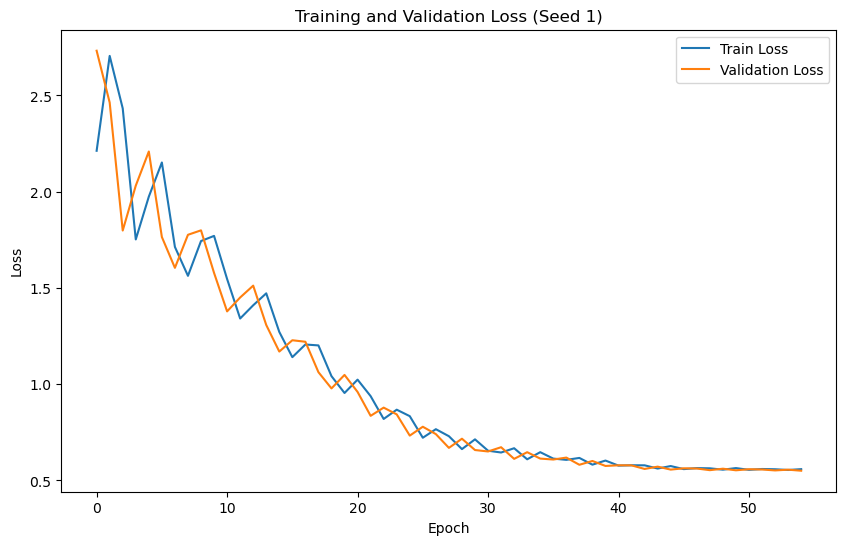

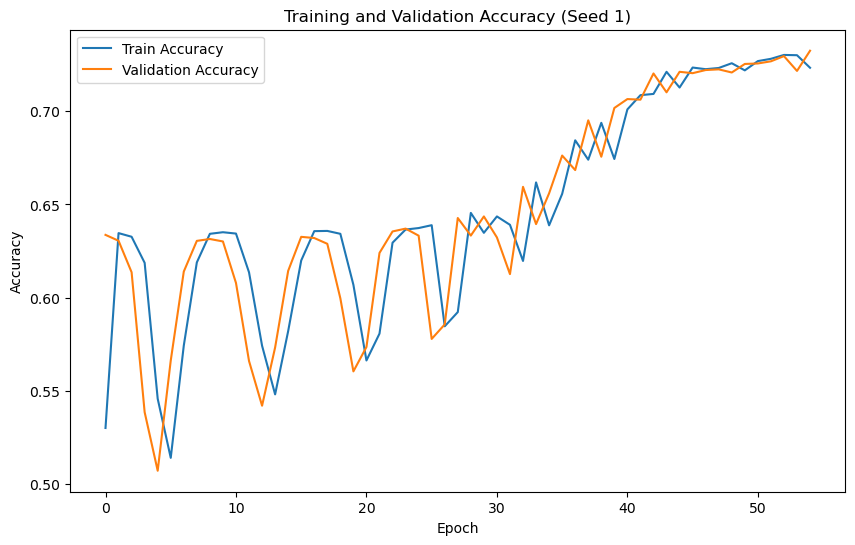


Training with random seed: 2
Epoch 0/55: Train Loss: 27.8699, Train Acc: 0.6293, Val Loss: 23.5365, Val Acc: 0.6309
Epoch 5/55: Train Loss: 7.1901, Train Acc: 0.6293, Val Loss: 3.2207, Val Acc: 0.6389
Epoch 10/55: Train Loss: 7.6297, Train Acc: 0.3707, Val Loss: 6.7818, Val Acc: 0.3691
Epoch 15/55: Train Loss: 1.6401, Train Acc: 0.6728, Val Loss: 2.6329, Val Acc: 0.6441
Epoch 20/55: Train Loss: 3.3918, Train Acc: 0.6373, Val Loss: 2.7508, Val Acc: 0.6446
Epoch 25/55: Train Loss: 1.5350, Train Acc: 0.6104, Val Loss: 2.1397, Val Acc: 0.5343
Epoch 30/55: Train Loss: 1.1937, Train Acc: 0.6495, Val Loss: 1.1653, Val Acc: 0.6679
Epoch 35/55: Train Loss: 1.6062, Train Acc: 0.6740, Val Loss: 1.4303, Val Acc: 0.6795
Epoch 40/55: Train Loss: 1.1648, Train Acc: 0.6359, Val Loss: 1.2956, Val Acc: 0.6108
Epoch 45/55: Train Loss: 0.9102, Train Acc: 0.6817, Val Loss: 0.9784, Val Acc: 0.6849
Epoch 50/55: Train Loss: 0.8236, Train Acc: 0.6873, Val Loss: 0.8041, Val Acc: 0.6710

Test Loss: 0.7548, Test

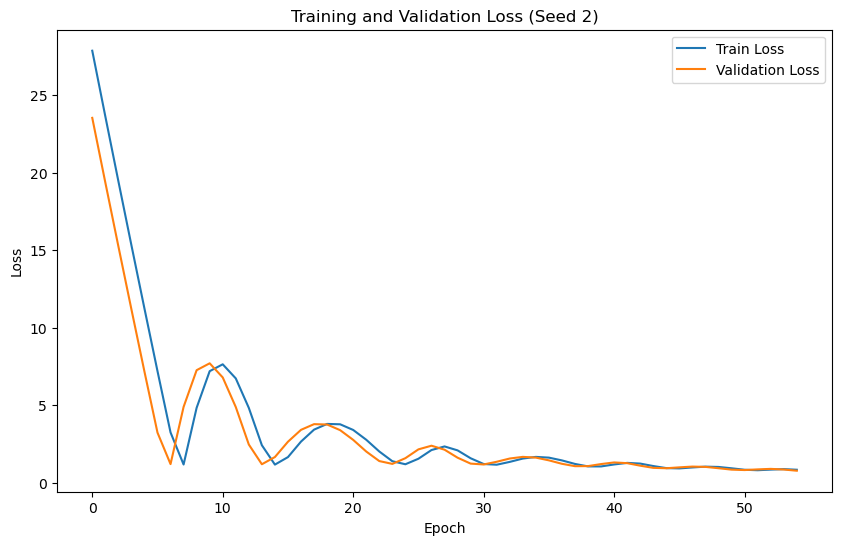

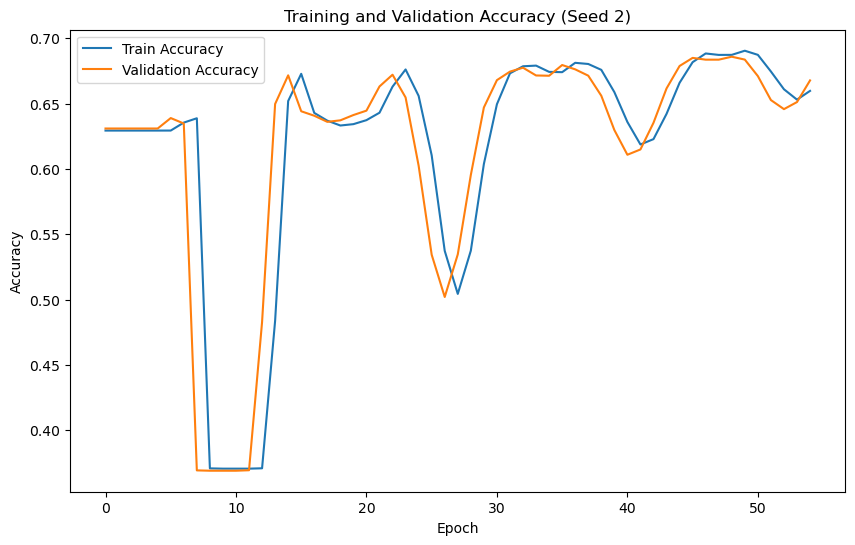


Training with random seed: 3
Epoch 0/55: Train Loss: 155.0810, Train Acc: 0.3707, Val Loss: 148.6343, Val Acc: 0.3691
Epoch 5/55: Train Loss: 122.8093, Train Acc: 0.3707, Val Loss: 117.0335, Val Acc: 0.3691
Epoch 10/55: Train Loss: 93.8777, Train Acc: 0.3707, Val Loss: 88.6215, Val Acc: 0.3691
Epoch 15/55: Train Loss: 67.8170, Train Acc: 0.3707, Val Loss: 63.0115, Val Acc: 0.3691
Epoch 20/55: Train Loss: 44.0978, Train Acc: 0.3707, Val Loss: 39.5994, Val Acc: 0.3691
Epoch 25/55: Train Loss: 21.8325, Train Acc: 0.3707, Val Loss: 17.4316, Val Acc: 0.3692
Epoch 30/55: Train Loss: 3.2733, Train Acc: 0.3910, Val Loss: 3.8965, Val Acc: 0.5560
Epoch 35/55: Train Loss: 9.2540, Train Acc: 0.6293, Val Loss: 9.7706, Val Acc: 0.6309
Epoch 40/55: Train Loss: 9.8381, Train Acc: 0.6293, Val Loss: 9.3529, Val Acc: 0.6309
Epoch 45/55: Train Loss: 6.4012, Train Acc: 0.6293, Val Loss: 5.2495, Val Acc: 0.6309
Epoch 50/55: Train Loss: 3.3222, Train Acc: 0.3290, Val Loss: 3.9371, Val Acc: 0.3632

Test Loss

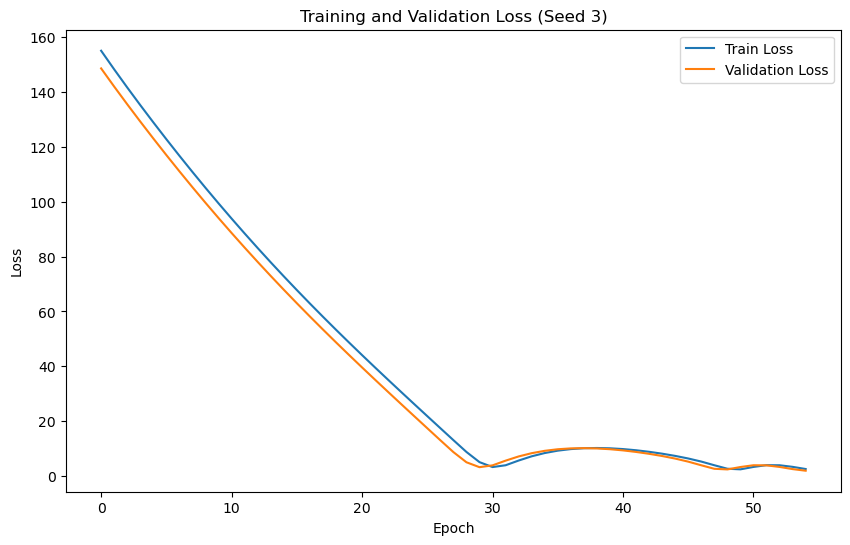

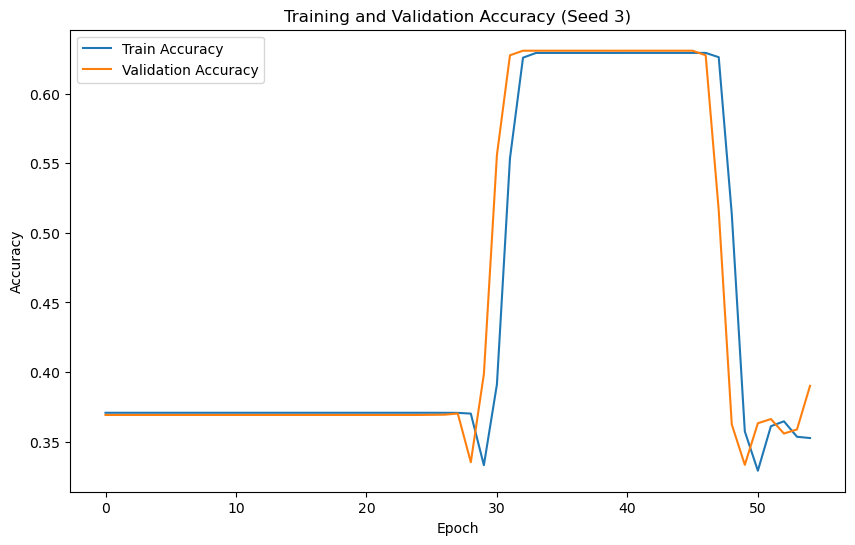


Training with random seed: 4
Epoch 0/55: Train Loss: 7.9906, Train Acc: 0.6297, Val Loss: 5.1375, Val Acc: 0.6319
Epoch 5/55: Train Loss: 4.2376, Train Acc: 0.4502, Val Loss: 3.5168, Val Acc: 0.4900
Epoch 10/55: Train Loss: 2.9423, Train Acc: 0.6353, Val Loss: 3.1163, Val Acc: 0.6324
Epoch 15/55: Train Loss: 2.2301, Train Acc: 0.6090, Val Loss: 2.1496, Val Acc: 0.5835
Epoch 20/55: Train Loss: 2.1372, Train Acc: 0.5372, Val Loss: 1.9397, Val Acc: 0.5632
Epoch 25/55: Train Loss: 1.8477, Train Acc: 0.6290, Val Loss: 1.7753, Val Acc: 0.6245
Epoch 30/55: Train Loss: 1.4677, Train Acc: 0.5408, Val Loss: 1.4670, Val Acc: 0.5331
Epoch 35/55: Train Loss: 1.1951, Train Acc: 0.6249, Val Loss: 1.1696, Val Acc: 0.6203
Epoch 40/55: Train Loss: 0.9836, Train Acc: 0.5242, Val Loss: 0.9152, Val Acc: 0.5458
Epoch 45/55: Train Loss: 0.7924, Train Acc: 0.6088, Val Loss: 0.7687, Val Acc: 0.5688
Epoch 50/55: Train Loss: 0.7324, Train Acc: 0.6278, Val Loss: 0.7193, Val Acc: 0.6335

Test Loss: 0.6558, Test A

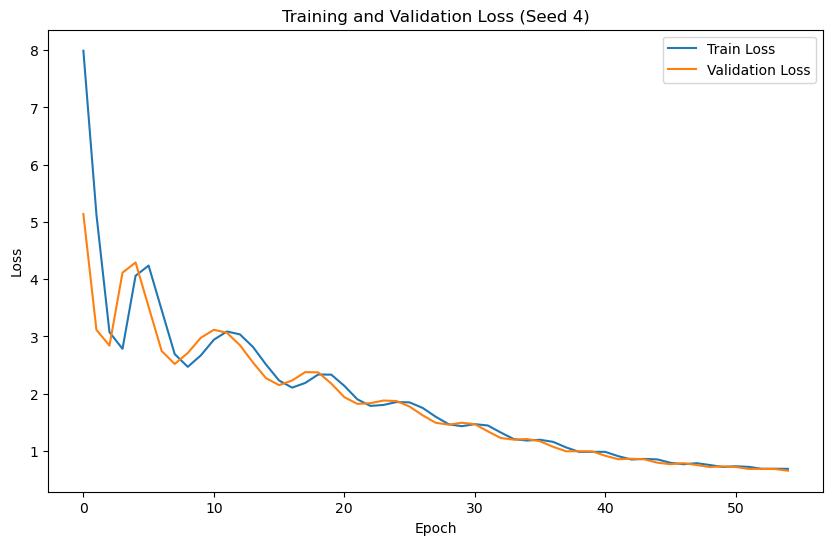

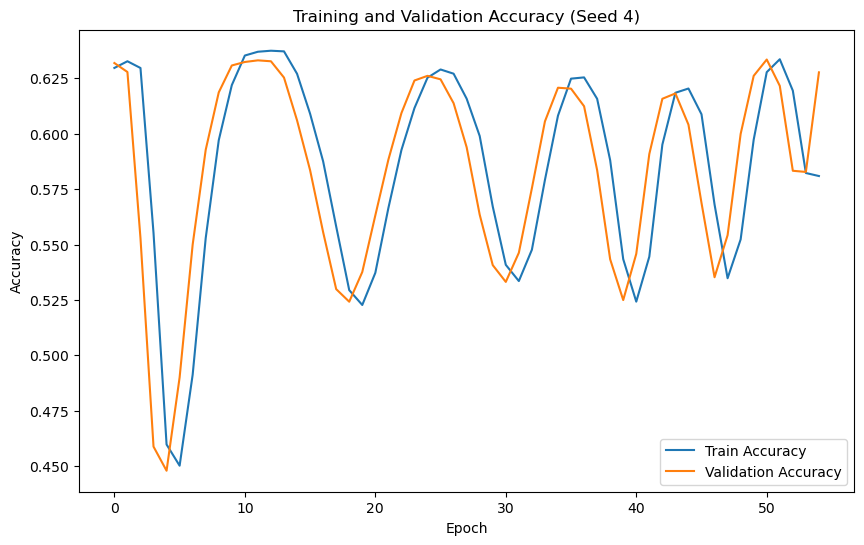


Training with random seed: 5
Epoch 0/55: Train Loss: 44.3751, Train Acc: 0.3707, Val Loss: 37.6280, Val Acc: 0.3691
Epoch 5/55: Train Loss: 11.8150, Train Acc: 0.3706, Val Loss: 6.0566, Val Acc: 0.3638
Epoch 10/55: Train Loss: 7.1630, Train Acc: 0.6293, Val Loss: 7.9234, Val Acc: 0.6309
Epoch 15/55: Train Loss: 7.6826, Train Acc: 0.6293, Val Loss: 6.9512, Val Acc: 0.6309
Epoch 20/55: Train Loss: 2.7401, Train Acc: 0.6269, Val Loss: 1.6201, Val Acc: 0.5616
Epoch 25/55: Train Loss: 3.7283, Train Acc: 0.3712, Val Loss: 3.5061, Val Acc: 0.3695
Epoch 30/55: Train Loss: 1.2564, Train Acc: 0.5480, Val Loss: 1.6564, Val Acc: 0.6117
Epoch 35/55: Train Loss: 1.9588, Train Acc: 0.6261, Val Loss: 1.5747, Val Acc: 0.6204
Epoch 40/55: Train Loss: 1.3908, Train Acc: 0.4185, Val Loss: 1.4995, Val Acc: 0.4061
Epoch 45/55: Train Loss: 0.9015, Train Acc: 0.6255, Val Loss: 1.0183, Val Acc: 0.6101
Epoch 50/55: Train Loss: 0.8875, Train Acc: 0.6492, Val Loss: 0.7943, Val Acc: 0.6376

Test Loss: 0.8914, Tes

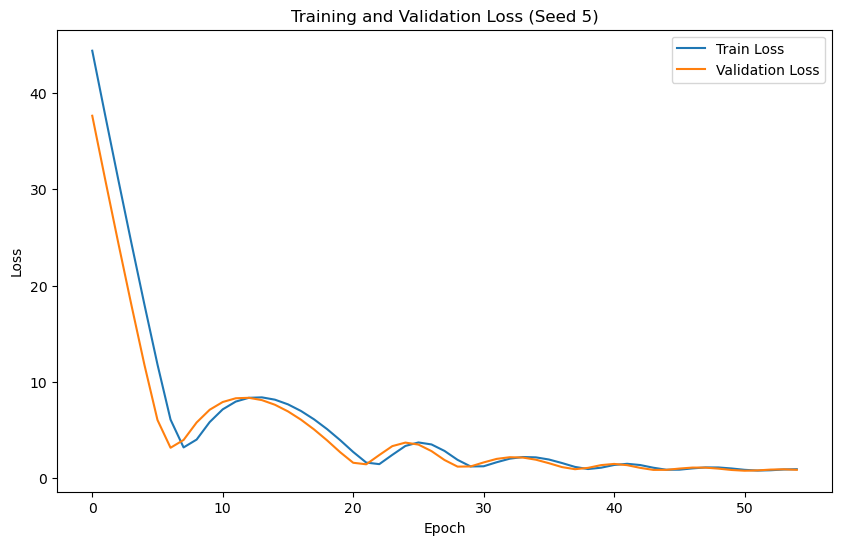

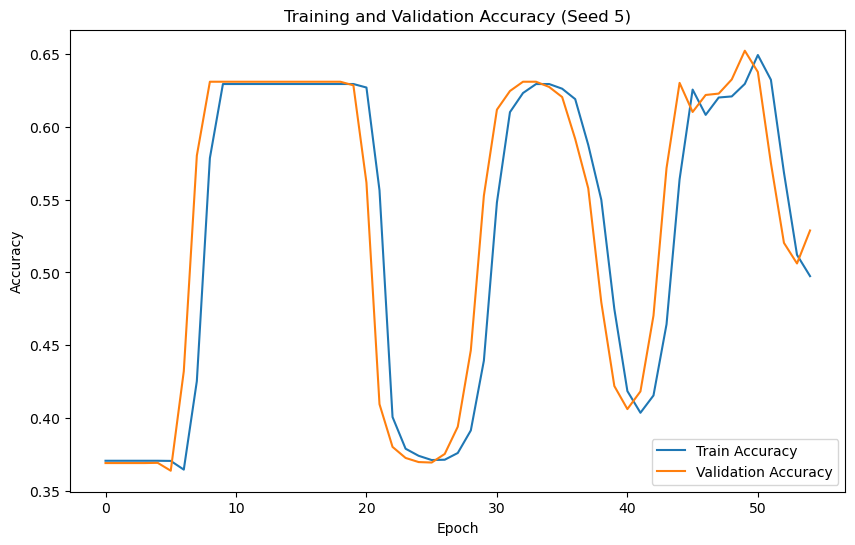


Best performance achieved with random seed: 1, Test Accuracy: 0.7286


In [15]:
num_classes = 4
num_features = 2
random_seeds = [1, 2, 3, 4, 5]

y = hotels_cop["is_canceled"].values
X = hotels_cop.drop(["is_canceled"], axis=1).values

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

class SimpleModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 11)
        self.fc2 = nn.Linear(11, out_features=output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_step(model, X_train, y_train, loss_fn, optimizer, device):
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_hat = model(X_train)
    loss = loss_fn(y_hat, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        _, test_pred = torch.max(y_hat, dim=1)
    
    train_acc = (test_pred == y_train).sum().item() / len(y_train)
    return loss.item(), train_acc

def evaluation_step(model, X_test, y_test, loss_fn, device):
    X_test, y_test = X_test.to(device), y_test.to(device)
    with torch.no_grad():
        outputs = model(X_test)
        loss = loss_fn(outputs, y_test).item()
        _, y_pred = torch.max(outputs, dim=1)
    
    accuracy = (y_pred == y_test).sum().item() / len(y_test)
    return loss, accuracy

def train_and_evaluate(X_train, y_train, X_val, y_val, X_test, y_test, random_seeds):
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"

    best_seed = None
    best_accuracy = 0

    for random_seed in random_seeds:
        print(f"\nTraining with random seed: {random_seed}")
        torch.manual_seed(random_seed)

        model = SimpleModel(input_size=X_train.shape[1], output_size=len(torch.unique(y_train))).to(device)
        
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
        loss_func = nn.CrossEntropyLoss()

        num_epochs = 55

        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []

        for epoch in range(num_epochs):
            model.train()
            train_loss, train_acc = train_step(model, X_train, y_train, loss_func, optimizer, device)
            train_losses.append(train_loss)
            train_accuracies.append(train_acc)

            model.eval()
            val_loss, val_acc = evaluation_step(model, X_val, y_val, loss_func, device)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)

            if epoch % 5 == 0:
                print(f"Epoch {epoch}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        model.eval()
        test_loss, test_acc = evaluation_step(model, X_test, y_test, loss_func, device)
        print(f"\nTest Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

        if test_acc > best_accuracy:
            best_accuracy = test_acc
            best_seed = random_seed

        plt.figure(figsize=(10, 6))
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss (Seed {random_seed})')
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(train_accuracies, label='Train Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Training and Validation Accuracy (Seed {random_seed})')
        plt.legend()
        plt.show()

    print(f"\nBest performance achieved with random seed: {best_seed}, Test Accuracy: {best_accuracy:.4f}")

train_and_evaluate(X_train, y_train, X_val, y_val, X_test, y_test, random_seeds)

# Conclusion

When comparing the results from the differing ML models we can see that, with this particular dataset, our Random Forest Classifiers and Neural Networks performed the best. Both models provided us with outstanding AUCs of .91